# Imports

In [15]:
import yfinance as yf
import pandas as pd
import numpy as np 

from sklearn.ensemble import RandomForestClassifier
from backtesting import Strategy
from backtesting import Backtest

## Get Data

In [3]:
ticker = 'NVDA'

df = yf.download(ticker)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376255,271468800
1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415672,51048000
1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383422,34320000
1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382227,24436800
1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381033,22752000
...,...,...,...,...,...,...
2023-12-12,460.459991,476.660004,460.459991,476.570007,476.570007,37238700
2023-12-13,476.290009,485.940002,476.079987,480.880005,480.880005,44779200
2023-12-14,483.899994,486.700012,474.220001,483.500000,483.500000,39123200


In [4]:
df = df.loc['2020-01-01':].copy() # Filter the data from 2020 up today
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.744049,23753600
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.787777,20538400
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.034313,26263600
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.749016,31485600
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.861088,27710800
...,...,...,...,...,...,...
2023-12-12,460.459991,476.660004,460.459991,476.570007,476.570007,37238700
2023-12-13,476.290009,485.940002,476.079987,480.880005,480.880005,44779200
2023-12-14,483.899994,486.700012,474.220001,483.500000,483.500000,39123200


In [5]:
# Percent change on Adj-Close

df['change_tomorrow'] = df['Adj Close'].pct_change(-1)
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.744049,23753600,0.016267
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.787777,20538400,-0.004176
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.034313,26263600,-0.011962
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.749016,31485600,-0.001872
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.861088,27710800,-0.010863
...,...,...,...,...,...,...,...
2023-12-12,460.459991,476.660004,460.459991,476.570007,476.570007,37238700,-0.008963
2023-12-13,476.290009,485.940002,476.079987,480.880005,480.880005,44779200,-0.005419
2023-12-14,483.899994,486.700012,474.220001,483.500000,483.500000,39123200,-0.011045


If you look at the change from the first day to the next one, the price decreases. Therefore, the first value of the previous output should be negative.

In [6]:
df.change_tomorrow = df.change_tomorrow * -1
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.744049,23753600,-0.016267
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.787777,20538400,0.004176
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.034313,26263600,0.011962
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.749016,31485600,0.001872
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.861088,27710800,0.010863
...,...,...,...,...,...,...,...
2023-12-12,460.459991,476.660004,460.459991,476.570007,476.570007,37238700,0.008963
2023-12-13,476.290009,485.940002,476.079987,480.880005,480.880005,44779200,0.005419
2023-12-14,483.899994,486.700012,474.220001,483.500000,483.500000,39123200,0.011045


Mutliply by 100 to have percentage values

In [7]:
df.change_tomorrow = df.change_tomorrow * 100
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.744049,23753600,-1.626651
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.787777,20538400,0.417615
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.034313,26263600,1.196175
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.749016,31485600,0.187220
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.861088,27710800,1.086320
...,...,...,...,...,...,...,...
2023-12-12,460.459991,476.660004,460.459991,476.570007,476.570007,37238700,0.896273
2023-12-13,476.290009,485.940002,476.079987,480.880005,480.880005,44779200,0.541881
2023-12-14,483.899994,486.700012,474.220001,483.500000,483.500000,39123200,1.104519


In [8]:
df.info() # last day is null

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 998 entries, 2020-01-02 to 2023-12-18
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             998 non-null    float64
 1   High             998 non-null    float64
 2   Low              998 non-null    float64
 3   Close            998 non-null    float64
 4   Adj Close        998 non-null    float64
 5   Volume           998 non-null    int64  
 6   change_tomorrow  997 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 62.4 KB


In [9]:
# Drop NaN value

df = df.dropna().copy()
df

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.744049,23753600,-1.626651
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.787777,20538400,0.417615
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.034313,26263600,1.196175
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.749016,31485600,0.187220
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.861088,27710800,1.086320
...,...,...,...,...,...,...,...
2023-12-11,474.910004,475.309998,458.299988,466.269989,466.269989,50972800,2.161281
2023-12-12,460.459991,476.660004,460.459991,476.570007,476.570007,37238700,0.896273
2023-12-13,476.290009,485.940002,476.079987,480.880005,480.880005,44779200,0.541881


Plot the distribution of change_tomorrow

<Axes: >

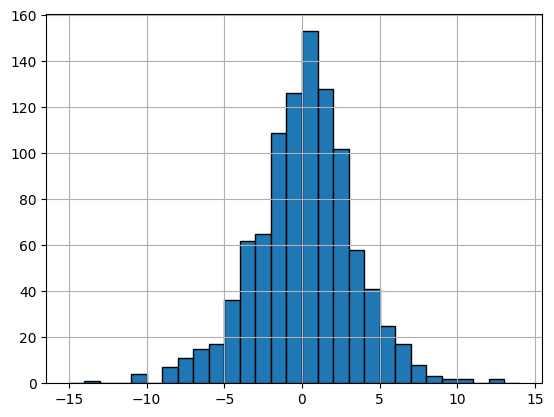

In [11]:
df.change_tomorrow.hist(bins=range(-15,15), edgecolor='black')

In [12]:
# St. Dev

df.change_tomorrow.std()

3.3984539322295197

68% of the changes are between -3.5 and 3.5, approximately

Did stock go up or down?

In [16]:
df.change_tomorrow = np.where(df.change_tomorrow > 0, 1, -1)
df 

,Open,High,Low,Close,Adj Close,Volume,change_tomorrow
Date,,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.744049,23753600,-1
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.787777,20538400,1
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.034313,26263600,1
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.749016,31485600,1
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.861088,27710800,1
...,...,...,...,...,...,...,...
2023-12-11,474.910004,475.309998,458.299988,466.269989,466.269989,50972800,1
2023-12-12,460.459991,476.660004,460.459991,476.570007,476.570007,37238700,1
2023-12-13,476.290009,485.940002,476.079987,480.880005,480.880005,44779200,1


## Random Forest Model

In [22]:
model = RandomForestClassifier(max_depth=8, random_state=42) 

In [23]:
# Define feature and target

y = df.change_tomorrow
X = df.drop(columns='change_tomorrow')

In [24]:
# Fit the model 

model.fit(X,y)

RandomForestClassifier(max_depth=8, random_state=42)

In [25]:
# Score 
model.score(X,y)

0.8154463390170511

## Backtesting

Our strategy is simple if model forecast for tomorrow is 1 and we don't have any position on this we buy, sell for wiseversa

In [26]:
class SimpleClassificationUP(Strategy):
    def init(self):
        self.model = model
        self.already_bought = False
    
    def next(self):
        explanatory_today = self.data.df.iloc[-1:,:]
        forecast_tomorrow = self.model.predict(explanatory_today)[0]

        #conditions
        if forecast_tomorrow == 1 and self.already_bought == False:
            self.buy()
            self.already_bought = True
        elif forecast_tomorrow == -1 and self.already_bought == True:
            self.sell()
            self.already_bought = False
        else:
            pass

In [27]:
bt = Backtest(X, SimpleClassificationUP, cash=10000, commission=.002, exclusive_orders=True)

In [28]:
results = bt.run()

In [29]:
# Show results in a dataframe

results.to_frame('Value').loc[:'Return [%]']  # Again return is high because we have used same data for training and testing 

,Value
Start,2020-01-02 00:00:00
End,2023-12-15 00:00:00
Duration,1443 days 00:00:00
Exposure Time [%],99.799398
Equity Final [$],238819725.415754
Equity Peak [$],239592763.485945
Return [%],2388097.254158


Plot the backtest. Output should be like this

![plot](images/plot_random.png)

In [31]:
bt.plot(filename='backtest_report.html')

/Users/burakbedir/Desktop/B/Project-Search-Docs/Algo-Trading/.venv/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/burakbedir/Desktop/B/Project-Search-Docs/Algo-Trading/.venv/lib/python3.11/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/burakbedir/Desktop/B/Project-Search-Docs/Algo-Trading/.venv/lib/python3.11/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/Users/burakbedir/Desktop/B/Project-Search-Docs/Algo-Trading/.venv/lib/python3.11/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values f

GridPlot(id='p1640', ...)